## Multi Layer Perceptron using Tensorflow (incorporating contextual information)

In [5]:
#Installing and importing the required libraries
!pip install tensorflow #(important to import keras from tensorflow to avoid
#compatibility issues between tensorflow and keras)
!pip install pandas
!pip install sklearn
!pip install tensorflow
!pip install seaborn
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer    
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
ratings_file2 = pd.read_csv('rfile2NOMODIFY.csv')

### Data Cleaning

In [237]:


# Loading test dataset for cleaning
test_ratings = pd.read_csv('/Volumes/Samsung_T5/Yahoo Movie Dataset 26.02.21/ydata-ymovies-user-movie-ratings-test-v1_0.csv', header=None)
test_ratings = test_ratings.rename({0:'user_id', 1:'film_id', 2:'rating'}, axis=1)
test_ratings = test_ratings.drop(test_ratings.columns[-1], axis=1)
test_ratings['old_id'] = test_ratings['film_id']

#Loading train dataset for cleaning
train_ratings = pd.read_csv('r_train.csv',skipinitialspace=True)
train_ratings.user_id.unique().shape
train_ratings = train_ratings.iloc[:,0:3]
train_ratings = train_ratings.rename(columns = {0:'user_id', 1:'film_id', 2:'rating'})
train_ratings['old_id'] = train_ratings['film_id']

#Applying function to map film ids to a number which the model can handle (from 1 to the n - where n is the total number of unique films)
def change(val):
    return r_train.film_id.loc[r_train.old_id==val].iloc[0]    
test_ratings['film_id'] = test_ratings['film_id'].apply(change)

uncompleted2 = [num for num in range(test_ratings.film_id.shape[0])]
film_map = {val:i for i,val in enumerate(train_ratings['film_id'])}

for val in test_ratings.film_id.unique():
    if len(uncompleted2) > 0:
        test_ratings['film_id'] = test_ratings['film_id'].replace([val], uncompleted2[0])
        uncompleted2.remove(uncompleted2[0])
test_ratings.to_csv('test_ratings_new.csv', index=False)

films = train_ratings.film_id.unique()
film = [film for film in films]
uncompleted = [num for num in range(11916)]

for val in train_ratings.film_id.unique():
    if len(uncompleted) > 0:
        train_ratings['film_id'] = train_ratings['film_id'].replace([val], uncompleted[0])
        uncompleted.remove(uncompleted[0])

#Min-max normalisation (to get values within the range 0 and 1 
#to facilitate use of tensorflow models)
min_rating = min(min(r_train.rating), min(r_test.rating))
max_rating = max(max(r_train.rating), max(r_test.rating))

r_train['rating'] = r_train['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))
r_test['rating'] = r_test['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

In [5]:
#Loading file containing chosen attributes about ratings,
#user, film and contextual data
ratings_file2 = pd.read_csv('ratings_file2.csv')
#Rounding ratings to 2 d.p. for simplification
ratings_file2 = ratings_file2.round(2)
#Viewing the file's dimensions
ratings_file2.shape

In [27]:
ratings_file2 = ratings_file2.drop(columns=['old_id', 'bagofwords'], axis=1)
#changing the order of the rows to train and the test the data using unordered samples
ratings_file2 = ratings_file2.sample(frac=1).reset_index(drop=True)
ratings_file2.to_csv('ratings_file2.csv', index=False)

In [23]:
import sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(combnotmodify, test_size=0.15, random_state=42)

In [12]:
combnotmodify = pd.concat([tfidfpcadfcom,ratings_file2],axis=1)
combnotmodify.rename({'0':'context'}, inplace=True, axis=1)

In [51]:
combnotmodify.shape

(221367, 6)

In [22]:
combnotmodify.head()

,context,user_id,film_id,rating,old_id
0,-0.029506,1.0,1889.0,0.92,1.800029e+09
1,-0.035127,1.0,1.0,0.58,1.804857e+09
2,-0.031490,1.0,2.0,1.00,1.800031e+09
3,-0.030762,1.0,3.0,0.83,1.800019e+09
4,-0.020182,1.0,4.0,0.67,1.800256e+09


In [15]:
combnotmodify = combnotmodify.drop(['bagofwords','old_id'],axis=1)

In [83]:
train.shape

(188161, 3)

In [77]:
nfilm_id = len(ratings_file3.film_id.unique())
nuser_id = len(ratings_file3.user_id.unique())

In [78]:
#Experimenting with simpler, earlier form of the model
input_films = tensorflow.keras.layers.Input(shape=[1])
embed_films = tensorflow.keras.layers.Embedding(nfilm_id + 1,10)(input_films)
films_out = tensorflow.keras.layers.Flatten()(embed_films)

#user input network
input_users = tensorflow.keras.layers.Input(shape=[1])
embed_users = tensorflow.keras.layers.Embedding(nuser_id + 1,10)(input_users)
users_out = tensorflow.keras.layers.Flatten()(embed_users)
#concatenated film and user layers- alternative to calculating the dot product 
conc_layer = tensorflow.keras.layers.Concatenate()([films_out, users_out])
x = tensorflow.keras.layers.Dense(128, activation='relu')(conc_layer)
x_out = x = tensorflow.keras.layers.Dense(1, activation='relu')(x)
model12 = tensorflow.keras.Model([input_films, input_users], x_out)

In [28]:
xtrains = train.drop(columns=['rating'], axis=1)
xtests = test.drop(columns=['rating'], axis=1)

In [29]:
xtrains = xtrains.reset_index(drop=True)
xtests = xtests.reset_index(drop=True)

In [ ]:
xtrains.to_csv('xtrains.csv', index=False)
xtests.to_csv('xtests.csv', index=False)
ytrains.to_csv('ytrains.csv', index=False)
ytests.to_csv('ytests.csv', index=False)

In [30]:
ytrains = train.drop(columns=['user_id', 'film_id'], axis=1).reset_index(drop=True)
ytests = test.drop(columns=['user_id', 'film_id'], axis=1).reset_index(drop=True)

In [79]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model12.compile(optimizer=opt, loss='mean_squared_error')
model12.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 1, 10)        119160      input_9[0][0]                    
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1, 10)        76430       input_10[0][0]                   
____________________________________________________________________________________________

In [24]:
#Setting up the early stopping to observed the loss function and stop the epochs
# early after it has deteriorated too many times
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
    EarlyStopping(monitor='loss', patience=2, verbose=1),
]


In [201]:
#Earlier model

model13 = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(10, activation='leaky_relu', name='layer1'),
    tensorflow.keras.layers.Dropout(rate=0.6),
    tensorflow.keras.layers.Dense(50, activation='leaky_relu',name='layer2'),
    tensorflow.keras.layers.Dropout(rate=0.6),
    tensorflow.keras.layers.Dense(1,name='layer3')
  ])
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model13.compile(optimizer=opt, loss=['mse'], metrics=['mae', 'mape', 'rmse'])

hist13 = model13.fit(np.array(xtrains), np.array(ytrains), batch_size=5, epochs=20, callbacks=callbacks,validation_data=(np.array(xtests),np.array(ytests)))

Epoch 1/20
37633/37633 [==============================] - 602s 16ms/step - loss: 59960.6602 - mae: 41.4493 - mape: 3217259008.0000 - val_loss: 0.0912 - val_mae: 0.2346 - val_mape: 57984924.0000
Epoch 2/20
37633/37633 [==============================] - 595s 16ms/step - loss: 0.0944 - mae: 0.2408 - mape: 56117868.0000 - val_loss: 0.0913 - val_mae: 0.2437 - val_mape: 54602328.0000
Epoch 3/20
37633/37633 [==============================] - 594s 16ms/step - loss: 0.0935 - mae: 0.2401 - mape: 56078908.0000 - val_loss: 0.0916 - val_mae: 0.2322 - val_mape: 58763992.0000
Epoch 4/20
37633/37633 [==============================] - 594s 16ms/step - loss: 0.0938 - mae: 0.2405 - mape: 56072364.0000 - val_loss: 0.0907 - val_mae: 0.2381 - val_mape: 56635184.0000
Epoch 5/20
23826/37633 [=================>............] - ETA: 3:29 - loss: 0.0936 - mae: 0.2401 - mape: 55782992.0000

KeyboardInterrupt: 

In [17]:
#Evaluating an earlier model
result = model8.evaluate([x_test.values],y_test.values, verbose=True)
print(result)

949/949 [==============================] - 7s 7ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.3102
[0.22515247762203217, 0.22515247762203217, 0.09623206406831741, 0.3102129399776459]


In [107]:
#Saving an earlier model to retrieve later
tf.keras.models.save_model(model9, 'hybridmodel9')

INFO:tensorflow:Assets written to: hybridmodel9/assets


INFO:tensorflow:Assets written to: hybridmodel9/assets


In [25]:
#Hybrid recommendation model using Tensorflow. Create three embeddings using user_id, film_id
#and contextual information and films. There three sets of two dense (fully-connected) layers.
#The dot product is calculated between the film and meta data vectors, and between the film and user vectors.
#The dot product is then calculated between these two results. The model learns to predict the
#ratings using latent relationship between user ids, film ids and metadata.

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(len(combnotmodify.user_id.unique())+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-users")(user_embedding)
user1 = Dense(100, name='uDense1')(user_vec)
user1 = Dropout(0.4)(user1)
user2 = Dense(100, name='uDense2')(user1)

movie_input = Input(shape=[1], name="Movie-Input")
movie_embedding = Embedding(len(combnotmodify.film_id.unique())+1, 5, name="Movie-Embedding")(movie_input)
movie_vec = Flatten(name="Flatten-movies")(movie_embedding)
movie1 = Dense(100, name='mDense1')(movie_vec)
movie1 = Dropout(0.4)(movie1)
movie2 = Dense(100, name='mDense2')(movie1)

md_input = Input(shape=[1], name="md-Input")
md_embedding = Embedding(len(combnotmodify.context.unique())+1, 5, name="Md-Embedding")(md_input)
md_vec = Flatten(name="Flatten-md")(md_embedding)
md1 = Dense(100, name='mdDense1')(md_vec)
md1 = Dropout(0.4)(md1)
md2 = Dense(100, name='mdDense2')(md1)

prod1 = Dot(name='Dot-Product1', axes=1)([md2, movie2])
prod2 = Dot(name="Dot-Product2", axes=1)([user2, movie2])
prod = Dot(name='Dot-Product3', axes=1)([prod1, prod2])

model14 = Model([user_input, movie_input, md_input], prod)
model14.compile('adam', 'mse', metrics=['mae', 'mape', 'rmse'])

movie_model = Model(movie_input,movie_vec)   

In [ ]:
history14 = model14.fit([train.user_id, train.film_id, train.context], train.rating,batch_size=20,epochs=10,callbacks=callbacks,validation_data=([test.user_id, test.film_id, test.context],test.rating))

In [62]:
#Savings the history for model14 as a pickle file to retrieve later
import pickle
f = open('history.pkl', 'wb')
pickle.dump(history14.history, f)
f.close()



In [56]:
#Making predictions using the hybrid model 14- each number is a prediction for 
#every possible combination of representative context, user_id and film_id
predictions = model14.predict([train.user_id, train.film_id, train.context])
predictions



array([[0.78313816],
       [0.7139394 ],
       [0.89655477],
       ...,
       [0.93717057],
       [1.0568788 ],
       [0.6114977 ]], dtype=float32)

In [74]:
#Collaborative-filtering model using Tensorflow. Calculates the dot product between
#the film and user embeddings.

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(len(combnotmodify.user_id.unique())+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-users")(user_embedding)
user1 = Dense(100, name='uDense1')(user_vec)
user1 = Dropout(0.4)(user1)
user2 = Dense(100, name='uDense2')(user1)

movie_input = Input(shape=[1], name="Movie-Input")
movie_embedding = Embedding(len(combnotmodify.film_id.unique())+1, 5, name="Movie-Embedding")(movie_input)
movie_vec = Flatten(name="Flatten-movies")(movie_embedding)
movie1 = Dense(100, name='mDense1')(movie_vec)
movie1 = Dropout(0.4)(movie1)
movie2 = Dense(100, name='mDense2')(movie1)

prod = Dot(name='Dot-Product1', axes=1)([user2, movie2])

model15 = Model([user_input, movie_input], prod)
model15.compile('adam', 'mse', metrics=['mae', 'mape'])

movie_model = Model(movie_input,movie_vec) 

In [75]:
history15 = model15.fit([train.user_id, train.film_id], train.rating,batch_size=20,epochs=10,callbacks=callbacks,validation_data=([test.user_id, test.film_id],test.rating))

Epoch 1/10
9409/9409 [==============================] - 354s 38ms/step - loss: 0.0711 - mae: 0.2000 - mape: 44197208.0000 - val_loss: 0.0660 - val_mae: 0.2039 - val_mape: 39356556.0000
Epoch 2/10
9409/9409 [==============================] - 355s 38ms/step - loss: 0.0600 - mae: 0.1795 - mape: 38427748.0000 - val_loss: 0.0618 - val_mae: 0.1810 - val_mape: 36480492.0000
Epoch 3/10
9409/9409 [==============================] - 354s 38ms/step - loss: 0.0565 - mae: 0.1727 - mape: 36415468.0000 - val_loss: 0.0603 - val_mae: 0.1757 - val_mape: 37919632.0000
Epoch 4/10
9409/9409 [==============================] - 354s 38ms/step - loss: 0.0543 - mae: 0.1682 - mape: 34948236.0000 - val_loss: 0.0608 - val_mae: 0.1804 - val_mape: 37285952.0000
Epoch 5/10
9409/9409 [==============================] - 351s 37ms/step - loss: 0.0523 - mae: 0.1643 - mape: 33840868.0000 - val_loss: 0.0623 - val_mae: 0.1734 - val_mape: 38820680.0000
Epoch 6/10
9409/9409 [==============================] - 349s 37ms/step - lo

In [ ]:
#x_train = r_train[["user_id", "film_id"]]
#y_train = r_train['rating']
#x_val = r_test[['user_id', 'film_id']]
#y_val = r_test['rating']


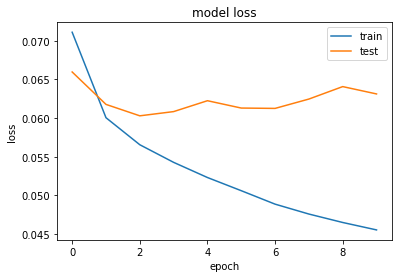

In [77]:
plt.plot(history15.history["loss"])
plt.plot(history15.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

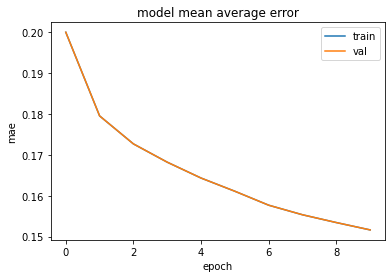

In [80]:
plt.plot(history15.history['mae'])
plt.plot(history15.history['mae'])
plt.title('model mean average error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [81]:
model15.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie-Input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         38215       User-Input[0][0]                 
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 5)         59580       Movie-Input[0][0]                
____________________________________________________________________________________________

In [263]:
#Previous data exploration
unique_not_seen = not_watched.shape
unique_films_user = movies_watched_by_user.shape
total_unique_films = pd.unique(r_train.old_id.values).shape
not_seen = [not_watched.iloc[i] for i in range(not_watched.shape[0])]

In [266]:
unique_not_seen, unique_films_user, total_unique_films

((11904,), (12,), (11916,))

In [334]:
user_movie_array = np.hstack(
    (user_encoder * len(movies_not_watched), movies_not_watched)
)
user_movie_array= user_movie_array[1:]
user_movie_array= user_movie_array[1:]

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(not_watched[x][0]) for x in top_ratings_indices
]

### Extracting contextual features, combining into bag of words column, applying TF-IDF and finally carrying out PCA to reduce dimensionality

In [88]:
movie_desc = pd.read_csv('movie_desc.csv', header=None)

In [89]:
movie_desc = movie_desc.rename(columns = {0:'movie_id',1:'title',2:'synopsis',3:'genre',4:'director',5:'director_id',6:'crew_type', 7: 'crew_member',8:'crew_id',9:'actor_name',10:'actor_id'})

In [90]:
smd3 = movie_desc.copy()
smd3 = smd3.drop(['director_id','crew_type', 'crew_member', 'crew_id', 'actor_id', 'title'], axis=1)

smd3 = smd3.dropna()

In [44]:
#smd.to_csv('smd.csv', index=False)

In [91]:
smd3.head()

,movie_id,synopsis,genre,director,actor_name
8,1800013223,A delightful animated version of Mark Twain's ...,Action/Adventure,Richard Thorpe|Michael Curtiz|Jack B. Hively,Forrest Tucker|Mickey Rooney|Tony Randall|Eddi...
13,1800013563,An inspiring tale of a family's struggle to su...,Action/Adventure,Stewart Raffill,Robert Logan|Susan Damante Shaw|Ham Larsen
23,1800014841,Four unforgettable tales of terror from Hitchc...,Suspense/Horror,Alfred Hitchcock,Barbara Bel Geddes|Tom Ewell|John Williams|Joh...
24,1800015027,An all-star cast brings Lewis Carroll's wonder...,Kids/Family,Harry Harris|Alan Handley,Ricardo Montalban|Nanette Fabray|Robert Coote|...
25,1800015177,The denizens of a rural township are terrorize...,Science Fiction/Fantasy,Don Dohler,Don Leifert|Tom Griffith|Dick Dyszel


In [92]:
#Removing punctuation before forming the bag of words column
#and putting the data into a consistent format 


smd3['director'] = smd3['director'].map(lambda x: x.lower())
smd3['synopsis'] = smd3['synopsis'].map(lambda x: x.lower())

smd3['synopsis'] = smd3['synopsis'].map(lambda x: x.lower())
smd3['director'] = smd3['director'].map(lambda x: x.lower())
smd3['actor_name'] = smd3['actor_name'].map(lambda x: x.lower())
smd3.actor_name = smd3.actor_name.replace(' ', '', regex=True)

# discarding the punctuation between the actors' full names and getting only the first three names
smd3['actor_name'] = smd3['actor_name'].map(lambda x: x.split(r'|')[:3])

# putting the genres in a list of words
smd3['genre'] = smd3['genre'].map(lambda x: x.lower().split(r'/'))

smd3['director'] = smd3['director'].map(lambda x: x.split(r'|')[0])

                                       
smd3.director = smd3.director.replace(' ', '', regex=True)

smd3.actor_name = smd3.actor_name.replace(' ', '', regex=True)

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in smd3.iterrows():
    row['actor_name'] = [x.lower().replace(' ','') for x in row['actor_name']]
    row['director'] = ''.join(row['director']).lower()

In [93]:
# initializing the new column
smd3['Key_words'] = ""

for index, row in smd3.iterrows():
    plot = row['synopsis']
    
    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary whith key words and their scores
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
smd3.drop(columns = ['synopsis'], inplace = True)

In [253]:
smd3 = smd3.drop(['title'], axis=1)

In [254]:
smd3.head()

,synopsis,genre,director,actor_name
movie_id,,,,
1800013223,a delightful animated version of mark twain's ...,"['action', 'adventure']",richardthorpe,"['forresttucker', 'mickeyrooney', 'tonyrandall']"
1800013563,an inspiring tale of a family's struggle to su...,"['action', 'adventure']",stewartraffill,"['robertlogan', 'susandamanteshaw', 'hamlarsen']"
1800014841,four unforgettable tales of terror from hitchc...,"['suspense', 'horror']",alfredhitchcock,"['barbarabelgeddes', 'tomewell', 'johnwilliams']"
1800015027,an all-star cast brings lewis carroll's wonder...,"['kids', 'family']",harryharris,"['ricardomontalban', 'nanettefabray', 'robertc..."
1800015177,the denizens of a rural township are terrorize...,"['science fiction', 'fantasy']",dondohler,"['donleifert', 'tomgriffith', 'dickdyszel']"


In [ ]:
#Creating the bag of words columns using contextual features synopsis, 
#genre, director, actor_name
smd3['bag_of_words'] = ''
columns = smd3.columns
for index, row in smd3.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
smd3.drop(columns = [col for col in smd3.columns if col!= 'bag_of_words'], inplace = True)

In [109]:
loaded_model = loaded_model.rename(columns={'movie_id': 'old_id'})

In [110]:
loaded_model.head()

,old_id,bag_of_words
0,1800013223,action adventure richardthorpe forresttucker m...
1,1800013563,action adventure stewartraffill robertlogan su...
2,1800014841,suspense horror alfredhitchcock barbarabelgedd...
3,1800015027,kids family harryharris ricardomontalban nanet...
4,1800015177,science fiction fantasy dondohler donleifert t...


In [142]:
#Merging the dataframe to bring everything together
ratings_file = pd.merge(rconc, loaded_model, how='left', on='old_id')

In [143]:
ratings_file.head()

,user_id,film_id,rating,old_id,bag_of_words
0,1,1889,0.916667,1800029049,comedy frankcapra carygrant priscillalane raym...
1,1,1,0.583333,1804857429,comedy robertluketic reesewitherspoon[ellewood...
2,1,2,1.000000,1800030906,comedy robertzemeckis michaelj.fox christopher...
3,1,3,0.833333,1800018548,comedy giljunger andrewkeegan[joeydonner] larr...
4,1,4,0.666667,1800256362,comedy michaellehmann janeanegarofalo umathurm...


In [146]:
#ratings_file.to_csv('ratings_file.csv', index=False)

In [138]:
rconc = rconc.drop(columns=['index'], axis=1)

In [115]:
rconc = pd.concat([r_train, r_test], axis=0)

In [132]:
rconc.reset_index(inplace=True)

In [141]:
#rconc.to_csv('rconc.csv', index=False)

In [127]:
pd.set_option('max_rows', 500)

In [43]:
n_users = len(ratings_file.user_id.unique())
n_items = len(ratings_file.film_id.unique())

In [3]:
class ContentFiltering(object):
    '''Method to carry out CF.
    Input a pandas dataframe with items and features.
    '''

    def __init__(self, data):
        self.data = data
        self.ids = data.index.tolist()

    def tfidf_tokenizer(self, documents_column_name):
        '''TF-IDF tokenization where documents_column_name points to the
        column with the text data needing to be tokenized.
        Returns a dataframe with TF-IDF features.'''
        tfidf = TfidfVectorizer(
            stop_words='english')
        tfidf_matrix = tfidf.fit_transform(self.data[documents_column_name])
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=self.ids)
        return tfidf_df


In [4]:
cf = ContentFiltering(ratings_file2)

In [5]:
ratings_file2.bagofwords = ratings_file2.bagofwords.fillna('none')

In [6]:
tfidfresults = cf.tfidf_tokenizer(documents_column_name='bagofwords')

In [16]:
ratings_file2.shape

(221367, 5)

In [7]:
#TF-IDF created a large number of columns so I split the dataset into 15 parts and
#applied PCA to each of them individually to reduce computational burden

tfidfresults1 = tfidfresults.iloc[:15000,:]
tfidfresults2 = tfidfresults.iloc[15000:30000,:]
tfidfresults3 = tfidfresults.iloc[30000:45000,:]
tfidfresults4 = tfidfresults.iloc[45000:60000,:]
tfidfresults5 = tfidfresults.iloc[60000:75000,:]
tfidfresults6 = tfidfresults.iloc[75000:90000,:]
tfidfresults7 = tfidfresults.iloc[90000:105000,:]
tfidfresults8 = tfidfresults.iloc[105000:120000,:]
tfidfresults9 = tfidfresults.iloc[120000:135000,:]
tfidfresults10 = tfidfresults.iloc[135000:150000,:]
tfidfresults11 = tfidfresults.iloc[150000:165000,:]
tfidfresults12 = tfidfresults.iloc[165000:180000,:]
tfidfresults13 = tfidfresults.iloc[180000:195000,:]
tfidfresults14 = tfidfresults.iloc[195000:210000,:]
tfidfresults15 = tfidfresults.iloc[210000:, :]

In [22]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
tfidfpca1 = pca.fit_transform(tfidfresults1)
tfidfpca2 = pca.fit_transform(tfidfresults2)
tfidfpca3 = pca.fit_transform(tfidfresults3)
tfidfpca4 = pca.fit_transform(tfidfresults4)
tfidfpca5 = pca.fit_transform(tfidfresults5)
tfidfpca6 = pca.fit_transform(tfidfresults6)
tfidfpca7 = pca.fit_transform(tfidfresults7)
tfidfpca8 = pca.fit_transform(tfidfresults8)
tfidfpca9 = pca.fit_transform(tfidfresults9)
tfidfpca10 = pca.fit_transform(tfidfresults10)
tfidfpca11 = pca.fit_transform(tfidfresults11)
tfidfpca12 = pca.fit_transform(tfidfresults12)
tfidfpca13 = pca.fit_transform(tfidfresults13)
tfidfpca14 = pca.fit_transform(tfidfresults14)
tfidfpca15 = pca.fit_transform(tfidfresults15)



In [23]:
tfidfpca15.shape

(11367, 1)

In [24]:
#Converting each array produced by PCA into dataframes before concatenating them
#with pd.concat
tfidfpcadf1 = pd.DataFrame(tfidfpca1, index=tfidfresults1.index.tolist())
tfidfpcadf2 = pd.DataFrame(tfidfpca2, index=tfidfresults2.index.tolist())
tfidfpcadf3 = pd.DataFrame(tfidfpca3, index=tfidfresults3.index.tolist())
tfidfpcadf4=pd.DataFrame(tfidfpca4,index=tfidfresults4.index.tolist()) 
tfidfpcadf5= pd.DataFrame(tfidfpca5, index=tfidfresults5.index.tolist())
tfidfpcadf6 = pd.DataFrame(tfidfpca6, index=tfidfresults6.index.tolist())
tfidfpcadf7 = pd.DataFrame(tfidfpca7, index=tfidfresults7.index.tolist())
tfidfpcadf8= pd.DataFrame(tfidfpca8, index=tfidfresults8.index.tolist()) 
tfidfpcadf9 = pd.DataFrame(tfidfpca9, index=tfidfresults9.index.tolist())
tfidfpcadf10=pd.DataFrame(tfidfpca10,index=tfidfresults10.index.tolist()) 
tfidfpcadf11= pd.DataFrame(tfidfpca11, index=tfidfresults11.index.tolist())
tfidfpcadf12 = pd.DataFrame(tfidfpca12, index=tfidfresults12.index.tolist())
tfidfpcadf13 = pd.DataFrame(tfidfpca13, index=tfidfresults13.index.tolist())
tfidfpcadf14 = pd.DataFrame(tfidfpca14, index=tfidfresults14.index.tolist())
tfidfpcadf15 = pd.DataFrame(tfidfpca15, index=tfidfresults15.index.tolist())

In [25]:
tfidfpcadfcom = pd.concat([tfidfpcadf1, tfidfpcadf2, tfidfpcadf3, tfidfpcadf4, tfidfpcadf5, tfidfpcadf6, tfidfpcadf7, tfidfpcadf8, tfidfpcadf9, tfidfpcadf10, tfidfpcadf11, tfidfpcadf12, tfidfpcadf13, tfidfpcadf14, tfidfpcadf15], axis=0)

In [29]:
tfidfpcadfcom.to_csv('tfidfpcadfcom.csv',index=False)

In [ ]:
tfidfpcadfcom = pd.read_csv('tfidfpcadfcom.csv')

In [30]:
#The file containing one column following PCA and concatenation needed renaming
tfidfpcadfcom = tfidfpcadfcom.rename({'0':'context'})